(440, 455)


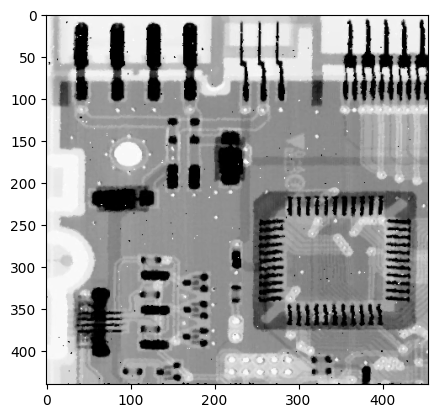

(440, 455)


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def reduce_SAP_12011923(input_image,n_size):#n也最好为奇数
    H,W=input_image.shape
    total=H*W*1
    
    output_image=np.zeros([H,W],dtype=np.uint8)
    
    #往四周补0
    padimage=np.pad(input_image,((int((n_size-1)/2),int((n_size-1)/2)),(int((n_size-1)/2),int((n_size-1)/2))),'constant',constant_values=(0,0))
    
    for i in range(int((n_size-1)/2),input_image.shape[0]+int((n_size-1)/2)):
        for j in range(int((n_size-1)/2),input_image.shape[1]+int((n_size-1)/2)):
            partimage=padimage[i-int((n_size-1)/2):i+int((n_size-1)/2)+1,j-int((n_size-1)/2):j+int((n_size-1)/2)+1]
            #print(partimage)
            #print(np.median(partimage))
            output_image[i-int((n_size-1)/2),j-int((n_size-1)/2)]=int(round(np.median(partimage)))
            
    return output_image

img=cv2.imread('Q3_4.tif',cv2.IMREAD_GRAYSCALE)
cv2.imshow('Q3_4',img)
cv2.waitKey(0)
print(img.shape)

x=np.arange(256)

out=reduce_SAP_12011923(img,3)

plt.imshow(out,cmap=plt.cm.gray)
plt.show()
savedimage1=Image.fromarray(out)
savedimage1.save('Q3_4_reduce_SAP_12011923.tif')
print(out.shape)